In [16]:
# Librairies basiques d'exploitation et visualization de données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import random # Pour pouvoir mélanger notre jeu de données

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Module pour l'affichage
from sklearn import set_config
set_config(display="diagram")

# Librairie pour la lecture et enregistrement des modèles
import pickle

In [19]:
# On importe le jeu de données
df = pd.read_csv("data_train.csv")

# Local

In [20]:
# On ne garde que les biens de type "Local"
loc = df.loc[df["Type local"] == "Local"]
loc.head(15)

,Valeur fonciere,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,Normalized_Mutations
29,78300.0,Local,0.0,0,783.0,1.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
74,55000.0,Local,75.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
75,55000.0,Local,75.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
86,110000.0,Local,98.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
87,110000.0,Local,98.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
94,65000.0,Local,100.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
95,65000.0,Local,100.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
134,130000.0,Local,170.0,0,542.0,1.0,2018,2,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
135,130000.0,Local,170.0,0,542.0,1.0,2018,2,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
168,80000.0,Local,104.0,0,0.0,0.0,2018,3,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454


In [21]:
loc.duplicated().sum()/loc.shape[0]

0.18856523655598

In [22]:
loc = loc[loc.duplicated()]

In [23]:
loc.drop(columns=["month"], inplace=True)

In [24]:
loc.drop(columns=["nom_region", "Type local", "Nombre pieces principales", "Normalized_Mutations", "year"], inplace=True)

In [25]:
loc.head()

,Valeur fonciere,Surface reelle bati,Surface terrain,exterieur,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
75,55000.0,75.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
87,110000.0,98.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
95,65000.0,100.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
135,130000.0,170.0,542.0,1.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
169,80000.0,104.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389


In [26]:
# On réalise une estimation du prix du bien en se basant sur le premier quartile du prix au m2 et la surface réelle bati (car les biens ont tendance à être moins cher)
loc["estimated"] = loc["q1_prixm2"]*loc["Surface reelle bati"]
loc.head(50)

,Valeur fonciere,Surface reelle bati,Surface terrain,exterieur,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,estimated
75,55000.0,75.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,124662.500000
87,110000.0,98.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,162892.333333
95,65000.0,100.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,166216.666667
135,130000.0,170.0,542.0,1.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,282568.333333
169,80000.0,104.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,172865.333333
173,70000.0,120.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,199460.000000
223,67000.0,63.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,104716.500000
233,125000.0,73.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,121338.166667
235,56000.0,87.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,144608.500000
247,65000.0,53.0,0.0,0.0,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,88094.833333


In [28]:
# On déclare nos variables quantitatives
quant_columns = [
       "Surface reelle bati",'Surface terrain','pop_active',
       'salaire_moyen', 'nb_etab_elem', "mean_prixm2","q1_prixm2","q3_prixm2","Total_Mutations"]

# On déclare nos variables quantitatives
cat_columns = [ 'exterieur']

In [30]:
# On crée une première pipeline qui va centrer et réduire nos variables quantitatives
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler())]
)


# On crée une seconde pipeline qui va créer un tableau disjonctif de notre variable qualitative puis la standardiser
categorical_transformer = Pipeline(
    steps=[("disjonctif", OneHotEncoder(handle_unknown="error")),
            ("standardize", Qual_Standardize())

    ]
)

# On crée un ColumnTransformer qui appliquera nos pipelines selon si elles sont qualitatives, quantitatives ou si c'est "Type local"
preprocessor = ColumnTransformer(
    transformers=[

        ("num", numeric_transformer, quant_columns),
        ("cat", categorical_transformer, cat_columns)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Surface reelle bati', 'Surface terrain',
                                  'pop_active', 'salaire_moyen', 'nb_etab_elem',
                                  'mean_prixm2', 'q1_prixm2', 'q3_prixm2',
                                  'Total_Mutations']),
                                ('cat',
                                 Pipeline(steps=[('disjonctif',
                                                  OneHotEncoder()),
                                                 ('standardize',
                                                  <__main__.Qual_Standardize object at 0x000001C400029370>)]),
                                 ['exterieur'])])

In [31]:
# On convertit notre variable extérieur en booléen.
loc["exterieur"] = loc["exterieur"].astype(bool)

In [32]:
# On extrait les variables exogènes
l_X = loc.iloc[:,1:]
l_X.head()

,Surface reelle bati,Surface terrain,exterieur,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,estimated
75,75.0,0.0,False,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,124662.500000
87,98.0,0.0,False,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,162892.333333
95,100.0,0.0,False,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,166216.666667
135,170.0,542.0,True,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,282568.333333
169,104.0,0.0,False,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,172865.333333


In [33]:
# On extrait notre variable endogène
l_y = loc.iloc[:,0]
l_y.head()

75      55000.0
87     110000.0
95      65000.0
135    130000.0
169     80000.0
Name: Valeur fonciere, dtype: float64

In [34]:
# On divise notre jeu de données en un échantillon d'apprentissage et un test
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X,l_y, test_size=0.33, random_state=1)

In [35]:
l_X_train.head()

,Surface reelle bati,Surface terrain,exterieur,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,estimated
534012,160.0,0.0,False,522553.0,15.104489,453,2413.042068,1757.121601,3154.389184,46727,281139.456099
1313312,21.0,0.0,False,255085.0,14.186588,411,1460.465703,1149.381250,1707.333000,13119,24137.006250
1578687,35.0,0.0,False,702047.0,18.863818,341,4918.896176,3767.871500,6025.591000,19913,131875.502500
220989,180.0,180.0,True,314664.0,14.478280,332,2063.042982,1539.534091,2460.363636,23509,277116.136364
784823,61.0,0.0,False,218624.0,14.215535,323,1558.632941,1199.283250,1803.125000,16220,73156.278250


In [36]:
l_y_train.head()

534012     171000.00
1313312    190070.38
1578687     95000.00
220989     215000.00
784823      54500.00
Name: Valeur fonciere, dtype: float64

## On compare avec un arbre de décision

In [65]:
# On instantie notre arbre de décision
regr_1 = DecisionTreeRegressor()
# On apprend notre arbre de décision sur notre échantillon d'apprentissage
regr_1.fit(l_X_train, l_y_train)
# On récupère les prédictions sur l'échantillon de validation
y_1 = regr_1.predict(l_X_test)

In [66]:
# On calcule l'erreur moyenne au carré
mean_squared_error(l_y_test, y_1)

5354069323.111406

In [67]:
# Pour avoir le meilleur modèle, on applique un GridSearchCV
parameters = {'min_samples_split': [100,500,1000,5000,10000], 
               'min_samples_leaf':[50,250,500,2500,5000],
               'random_state':[42]
               }

# On applique comme score le "neg_mean_squared_error" car GridSearchCV va essayer de maximiser le score
grid_reg = GridSearchCV(regr_1, parameters, scoring="neg_mean_squared_error", cv=None)
grid_reg.fit(l_X_train, l_y_train)
y_1 = grid_reg.predict(l_X_test)

In [68]:
mean_squared_error(l_y_test, y_1)

5140335863.906445

In [69]:
# On enregistre le modèle d'arbre de régression avec les meilleurs hyperparamètres pour l'échantillon de test final
model_pkl_file = "local_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(grid_reg.best_estimator_, file)

On extrait l'importance de chaque variables dans l'arbre de décision.

In [70]:
feat_import = pd.DataFrame({"importance": grid_reg.best_estimator_.feature_importances_, "variables": l_X_train.columns}).sort_values(by="importance", ascending=False)
feat_import

,importance,variables
10,0.433064,estimated
0,0.191788,Surface reelle bati
5,0.097825,nb_etab_elem
4,0.095940,salaire_moyen
3,0.063295,pop_active
1,0.050205,Surface terrain
9,0.040467,Total_Mutations
7,0.011507,q1_prixm2
8,0.008689,q3_prixm2
6,0.007220,mean_prixm2


C'est principalement l'estimation du prix et la surface réelle du batiment qui sont clés. Ensuite, quelques variables démographiques.

<Axes: xlabel='importance', ylabel='variables'>

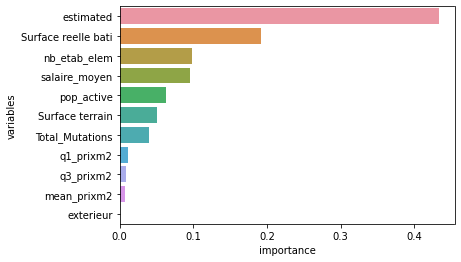

In [71]:
sns.barplot(data=feat_import,  x="importance",y="variables")